In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
df=pd.read_csv('Future_years.csv')

In [91]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
       '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28'],
      dtype='object', length=307)

In [76]:
Years= df.drop(['RegionID','SizeRank','RegionName','StateName'], axis=1)

In [77]:
Years.head()

,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,country,120187.291338,120398.739312,120660.965935,121223.390567,121870.673889,122564.648851,123299.704263,124093.125046,124918.423520,...,352914.638679,353466.996967,353612.598368,353851.962049,354295.143248,354873.991396,355358.916720,356067.058847,356686.351705,357138.132256
1,msa,215997.979545,216915.849088,217842.219756,219719.405192,221663.295718,223818.384912,226172.873617,228680.532748,231246.844804,...,655775.193541,658849.712644,661590.751300,665325.900420,669344.302493,672861.282874,675626.194374,677406.746915,678476.263587,679755.746376
2,msa,223845.478204,224678.467396,225788.001055,227995.600317,230410.021823,232807.534812,235265.226914,237746.333468,240083.515132,...,939338.772106,943348.163884,947786.830884,953046.620772,959562.454127,964859.346450,969423.172391,973502.535403,974045.970345,971995.753941
3,msa,150668.753070,150808.228444,151073.861750,151734.691403,152529.589990,153421.681269,154371.192563,155710.987115,157284.221888,...,314546.393299,315749.091850,316472.773117,317379.333016,318365.905134,319327.319692,320348.475962,321575.006711,322895.868446,324218.209834
4,msa,126168.387128,126224.582968,126289.185839,126456.952710,126678.148736,126902.044786,127136.796732,127488.453208,127929.151841,...,375056.853849,374392.029934,373452.807103,372801.133481,372603.234747,372497.321500,372208.925541,371684.816971,371161.901269,370383.507210


In [78]:
Entries= Years.drop('RegionType', axis=1)

In [79]:
Entries.head()

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28
0,120187.291338,120398.739312,120660.965935,121223.390567,121870.673889,122564.648851,123299.704263,124093.125046,124918.423520,125746.865329,...,352914.638679,353466.996967,353612.598368,353851.962049,354295.143248,354873.991396,355358.916720,356067.058847,356686.351705,357138.132256
1,215997.979545,216915.849088,217842.219756,219719.405192,221663.295718,223818.384912,226172.873617,228680.532748,231246.844804,233806.510376,...,655775.193541,658849.712644,661590.751300,665325.900420,669344.302493,672861.282874,675626.194374,677406.746915,678476.263587,679755.746376
2,223845.478204,224678.467396,225788.001055,227995.600317,230410.021823,232807.534812,235265.226914,237746.333468,240083.515132,242170.500048,...,939338.772106,943348.163884,947786.830884,953046.620772,959562.454127,964859.346450,969423.172391,973502.535403,974045.970345,971995.753941
3,150668.753070,150808.228444,151073.861750,151734.691403,152529.589990,153421.681269,154371.192563,155710.987115,157284.221888,159096.530233,...,314546.393299,315749.091850,316472.773117,317379.333016,318365.905134,319327.319692,320348.475962,321575.006711,322895.868446,324218.209834
4,126168.387128,126224.582968,126289.185839,126456.952710,126678.148736,126902.044786,127136.796732,127488.453208,127929.151841,128430.530649,...,375056.853849,374392.029934,373452.807103,372801.133481,372603.234747,372497.321500,372208.925541,371684.816971,371161.901269,370383.507210


In [80]:
#Filter specific region
def find_region_rows(region_name):
    region_data = df[df['RegionName'] == region_name]
    return region_data.index.tolist()

## Graph (2000-2024)

In [81]:
def Graph(df, region_name):
    row= find_region_rows(region_name)
    X=df.iloc[row, :]
    

    # Example: Suppose df has 1 row and multiple columns, each column is a date
    # and the single row holds property prices.

    # Step 1: Transpose the DataFrame so columns become rows
    df_t = X.T  # Now each row is a (date, price) pair

    # Step 2: Rename the columns for clarity
    df_t = df_t.reset_index()
    df_t.columns = ["date", "price"]  # date is the old column header, price is the old row value

    # Step 3: Convert the date column to datetime format
    df_t["date"] = pd.to_datetime(df_t["date"], format="%Y-%m-%d")

    # Step 4: Plot using Pandas
    df_t.plot(x="date", y="price", figsize=(10, 6), marker="o", title="Property Price Over Time")

    # Step 5: Show the plot
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.show()

    

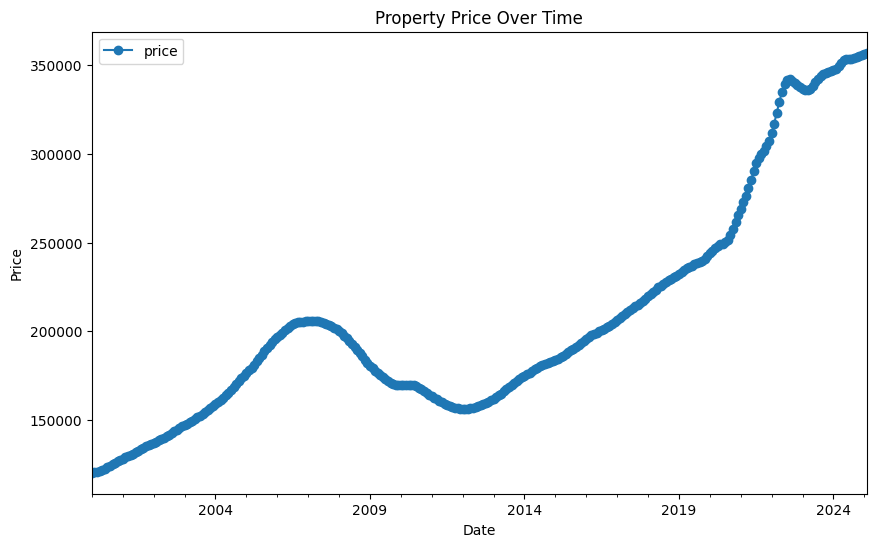

In [82]:
Graph(Entries, 'United States')

## **Model Creation**


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [86]:
def Data_Extract(region_name):
    # Find row index for the region
    row_idx = df[df['RegionName'] == region_name].index[0]
    
    # Extract data starting from the 6th column (index 5)
    data = pd.DataFrame({
        'Date': df.columns[5:],
        'Property_Value': df.iloc[row_idx, 5:].values
    })
    
    # Convert Date column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Sort by date
    data = data.sort_values('Date').reset_index(drop=True)
    
    return data

# Test the function
Prices = Data_Extract('United States')
display(Prices.head())

# Optional: Add basic validation
print(f"\nShape of extracted data: {Prices.shape}")
print(f"Date range: {Prices['Date'].min()} to {Prices['Date'].max()}")

,Date,Property_Value
0,2000-01-31,120187.291338
1,2000-02-29,120398.739312
2,2000-03-31,120660.965935
3,2000-04-30,121223.390567
4,2000-05-31,121870.673889



Shape of extracted data: (302, 2)
Date range: 2000-01-31 00:00:00 to 2025-02-28 00:00:00


In [87]:
def pred(df, region_name):
    data = Data_Extract(region_name)
    
    # Create Prophet model
    m = Prophet()
    
    # Rename columns for Prophet
    prophet_data = data.rename(columns={
        'Date': 'ds',
        'Property_Value': 'y'
    })
    
    # Fit the model
    m.fit(prophet_data)
    
    # Create future dates dataframe
    future = m.make_future_dataframe(periods=3650)
    
    # Make predictions
    forecast = m.predict(future)
    m.plot_components(forecast)
    
    # Visualize results
    fig = m.plot(forecast)
    plt.title(f'Property Value Predictions - {region_name}')  # Move title inside function
    plt.xlabel('Date')
    plt.ylabel('Property Value ($)')
    plt.tight_layout()
    plt.show()
    
    return m, forecast



16:56:54 - cmdstanpy - INFO - Chain [1] start processing
16:56:54 - cmdstanpy - INFO - Chain [1] done processing


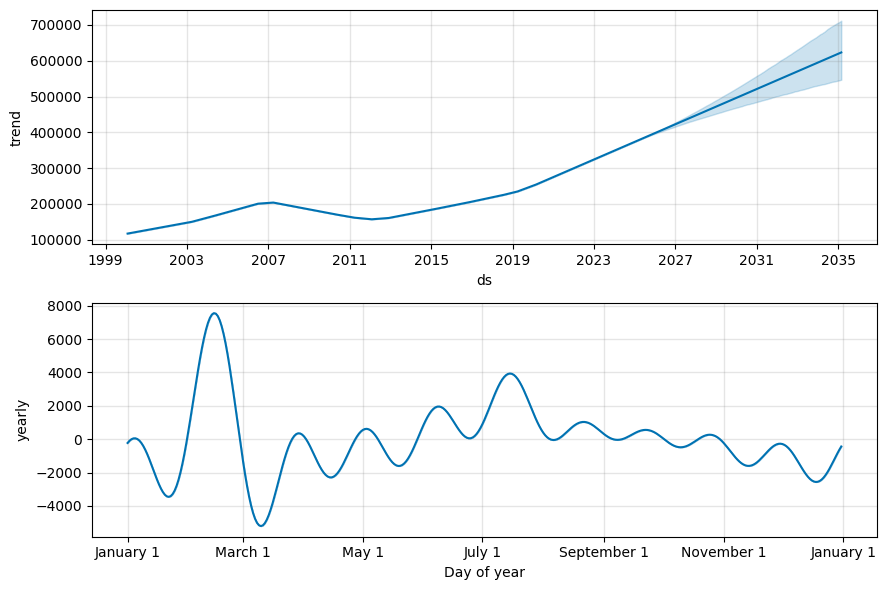

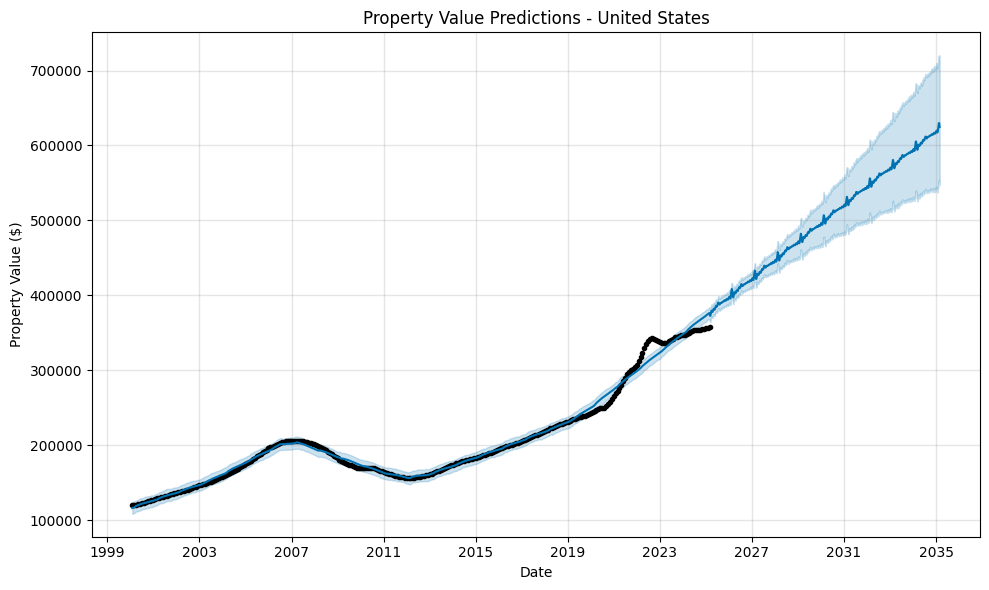

In [88]:
# Test the function
model, predictions = pred(df, 'United States')



In [89]:
import json 
columns= {
        'data Columns' : [col for col in df['RegionName'].tolist()],
}

with open('Regions.json' , 'w') as f:
    json.dump(columns, f, indent=4)
    